## Load Libraries

In [1]:
import numpy as np
import os
import shutil
import seaborn as sns
from sklearn.metrics import confusion_matrix,roc_curve
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array,load_img,smart_resize,ImageDataGenerator,array_to_img,save_img
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.plotting import plot_confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.resnet_v2 import ResNet50V2,ResNet152V2,ResNet101V2
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense,Activation,Flatten,GlobalAveragePooling2D,Dropout,BatchNormalization,Conv2D
print('Done..........')

Done..........


In [2]:
tf.__version__

'2.9.0'

## GPU 

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11652150292410839879
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1738696295
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7885309775013850477
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


## Set Seed

In [5]:
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED']=str(42)
np.random.seed(42)
tf.config.experimental.enable_op_determinism()

## Dataset

In [6]:
dataset_path = './Yoga_New_Dataset_Resized/'

In [7]:
train_dir = '../Yoga_New_Dataset_Resized/TRAIN/'
test_dir = '../Yoga_New_Dataset_Resized/TEST/'

## Data Augmentation ( Optional )
**Uncomment the following section of data augmentation for augmented data**

In [8]:
# Datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,rotation_range=40, fill_mode='nearest',width_shift_range=0.2, height_shift_range=0.2)

In [9]:
# train_generator = Datagen.flow_from_directory(train_dir,batch_size=1000,class_mode='categorical',target_size=(100,100))

In [10]:
# print(train_generator.class_indices)

In [11]:
# New_Img_Features,New_Img_Label = train_generator.next()

In [12]:
# for i in range(len(New_Img_Label)):
#     lab = list(New_Img_Label[i]).index(1.0)
#     cls = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(lab)]
#     New_Img_Features[i]=New_Img_Features[i]*255
#     save_path=train_dir+cls+'/augmented_'+cls+str(i)+'.jpg'
#     save_img(save_path,New_Img_Features[i])

##  Data Augmentation (End)

## Data Labeling

In [13]:
Train_Label = []
Test_Label = []

In [14]:
for img_dir in os.listdir(train_dir):
    for img in os.listdir(train_dir+'/'+img_dir):
        Train_Label.append(img_dir)

In [15]:
for img_dir in os.listdir(test_dir):
    for img in os.listdir(test_dir+'/'+img_dir):
        Test_Label.append(img_dir)

In [16]:
len(Train_Label)

1081

In [17]:
len(Test_Label)

470

## Features

In [18]:
Train_Features = []
Test_Features = []

In [19]:
for img_dir in os.listdir(train_dir):
    for img in os.listdir(train_dir+'/'+img_dir):
        pic = load_img(train_dir+'/'+img_dir+'/'+img)
        Train_Features.append(img_to_array(pic))

C:\ProgramData\Anaconda3\envs\tf2.9\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
for img_dir in os.listdir(test_dir):
    for img in os.listdir(test_dir+'/'+img_dir):
        pic = load_img(test_dir+'/'+img_dir+'/'+img)
        Test_Features.append(img_to_array(pic))

In [21]:
len(Train_Features)

1081

In [22]:
len(Test_Features)

470

## Scaling & Encoding

In [23]:
Train_Features = np.asarray(Train_Features)/255
Test_Features = np.asarray(Test_Features)/255

In [24]:
encoder = LabelEncoder()
Train_Label = encoder.fit_transform(Train_Label)
Test_Label = encoder.transform(Test_Label)

In [25]:
encoder.classes_

array(['downdog', 'goddess', 'plank', 'tree', 'warrior2'], dtype='<U8')

In [26]:
tr_y = to_categorical(Train_Label,len(set(Train_Label)))
test_y = to_categorical(Test_Label,len(set(Test_Label)))

## Base Model
**Uncomment the desired model and try**

In [27]:
Base_Model = VGG19(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [28]:
# Base_Model = VGG16(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [29]:
# Base_Model = InceptionV3(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [30]:
# Base_Model = DenseNet201(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [31]:
# Base_Model = ResNet50(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [32]:
# Base_Model = ResNet50V2(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [33]:
# Base_Model = ResNet101V2(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [34]:
# Base_Model = ResNet152V2(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [35]:
# Base_Model = MobileNet(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [36]:
# Base_Model = MobileNetV2(input_shape=(100,100,3),weights='imagenet',include_top=False)

In [37]:
# Base_Model = InceptionResNetV2(input_shape=(100,100,3),weights='imagenet',include_top=False)

## Model's Summary

In [38]:
Base_Model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [39]:
Base_Model.trainable = False

## Final Layer

In [40]:
final_model = [
        Flatten(),
        Dense(units=256,activation='relu'),
        Dense(units=128,activation='relu'),
        Dropout(0.3),
        Dense(units=64,activation='relu'),
        Dropout(0.3),
        Dense(units=32,activation='relu'),
        Dropout(0.3),
        Dense(units=16,activation='relu'),
        Dropout(0.3),
        Dense(units=len(set(Train_Label)),activation='softmax')
        ]

## Model Compiling & Training

In [41]:
all_layers = [Base_Model]
for i in final_model:
    all_layers.append(i)

In [42]:
model = Sequential(all_layers)

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 3, 3, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [45]:
callback = EarlyStopping(monitor='loss',patience=3)

In [46]:
history = model.fit(Train_Features,tr_y,validation_data=(Test_Features,test_y),epochs=100,batch_size=128,callbacks=[callback])

Epoch 1/100
9/9 [==============================] - 23s 1s/step - loss: 1.7342 - acc: 0.1952 - val_loss: 1.5966 - val_acc: 0.2468
Epoch 2/100
9/9 [==============================] - 4s 416ms/step - loss: 1.6221 - acc: 0.2396 - val_loss: 1.5589 - val_acc: 0.3106
Epoch 3/100
9/9 [==============================] - 4s 413ms/step - loss: 1.5980 - acc: 0.2451 - val_loss: 1.5205 - val_acc: 0.4915
Epoch 4/100
9/9 [==============================] - 4s 415ms/step - loss: 1.5769 - acc: 0.2525 - val_loss: 1.4902 - val_acc: 0.5681
Epoch 5/100
9/9 [==============================] - 4s 419ms/step - loss: 1.5016 - acc: 0.3414 - val_loss: 1.2783 - val_acc: 0.6468
Epoch 6/100
9/9 [==============================] - 4s 417ms/step - loss: 1.3863 - acc: 0.3996 - val_loss: 1.0885 - val_acc: 0.6894
Epoch 7/100
9/9 [==============================] - 4s 417ms/step - loss: 1.2913 - acc: 0.4958 - val_loss: 0.9595 - val_acc: 0.7511
Epoch 8/100
9/9 [==============================] - 4s 418ms/step - loss: 1.2305 - acc

In [47]:
y_pred_prob = model.predict(Test_Features,batch_size=128)

4/4 [==============================] - 1s 297ms/step


In [48]:
y_pred_class = np.argmax(y_pred_prob,axis=1)

In [49]:
y_class = np.argmax(test_y,axis=1)

## Result & Report

In [50]:
print(classification_report(y_pred_class,y_class))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        99
           1       0.93      0.94      0.93        79
           2       0.96      0.94      0.95       117
           3       0.99      0.96      0.97        71
           4       0.89      0.93      0.91       104

    accuracy                           0.94       470
   macro avg       0.94      0.94      0.94       470
weighted avg       0.94      0.94      0.94       470



Confusion Matrix with Normalized Values


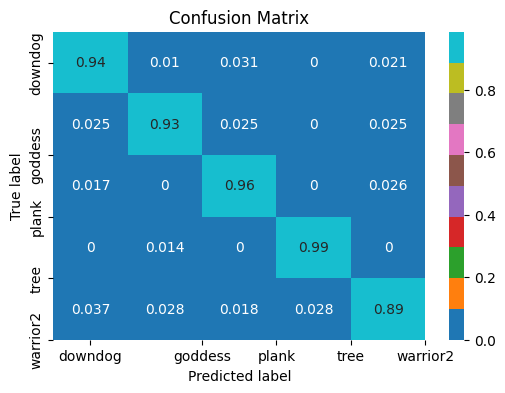

In [51]:
def plot_confusion_matrix(normalize):
  classes = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
  #tick_marks = [0.5,1.5,2.5,3.5,4.5]
  tick_marks = [0.5,2.0,3.0,4.0,5.0]
  cn = confusion_matrix(y_class, y_pred_class,normalize=normalize)
  plt.figure(figsize=(6,4))
  sns.heatmap(cn,cmap='tab10',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig('VGG19_augmented.png')
  plt.show()
  

#print('Confusion Matrix without Normalization')
#plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

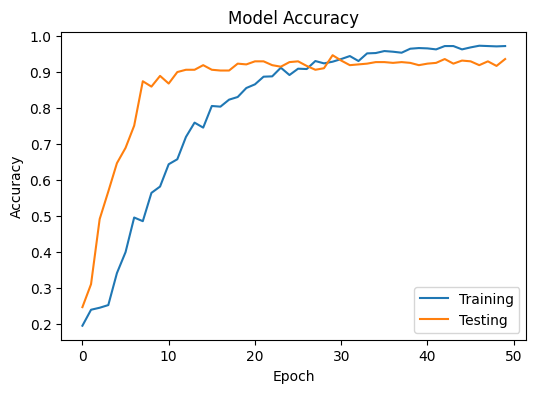

In [52]:
plt.figure(figsize=(6,4))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('VGG19_aug_accuracy.png')
plt.show()

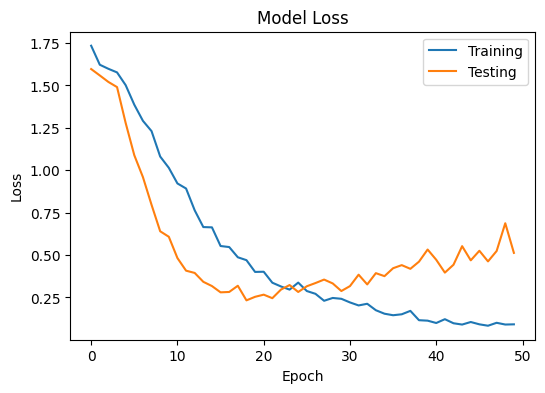

In [53]:
plt.figure(figsize=(6,4))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('VGG19_aug_loss.png')
plt.show()